## Task2 - Clustering techniques for any customer dataset using machine learning

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [2]:
df= pd.read_csv(r"C:\Users\Admin\Downloads\INTERNSAVY\Clustering techniques for any customer dataset using machine learning\Mall_Customers.csv")

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Preprocessing

## Checking any missing values

In [3]:
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Drop the CustomerID column as it's not relevant for clustering
df.drop('CustomerID', axis=1, inplace=True)

In [7]:
# Display the first few rows of the data
print(df.head())

    Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [8]:
# Map 'Male' to 0 and 'Female' to 1
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

## Visualize the distribution of each feature

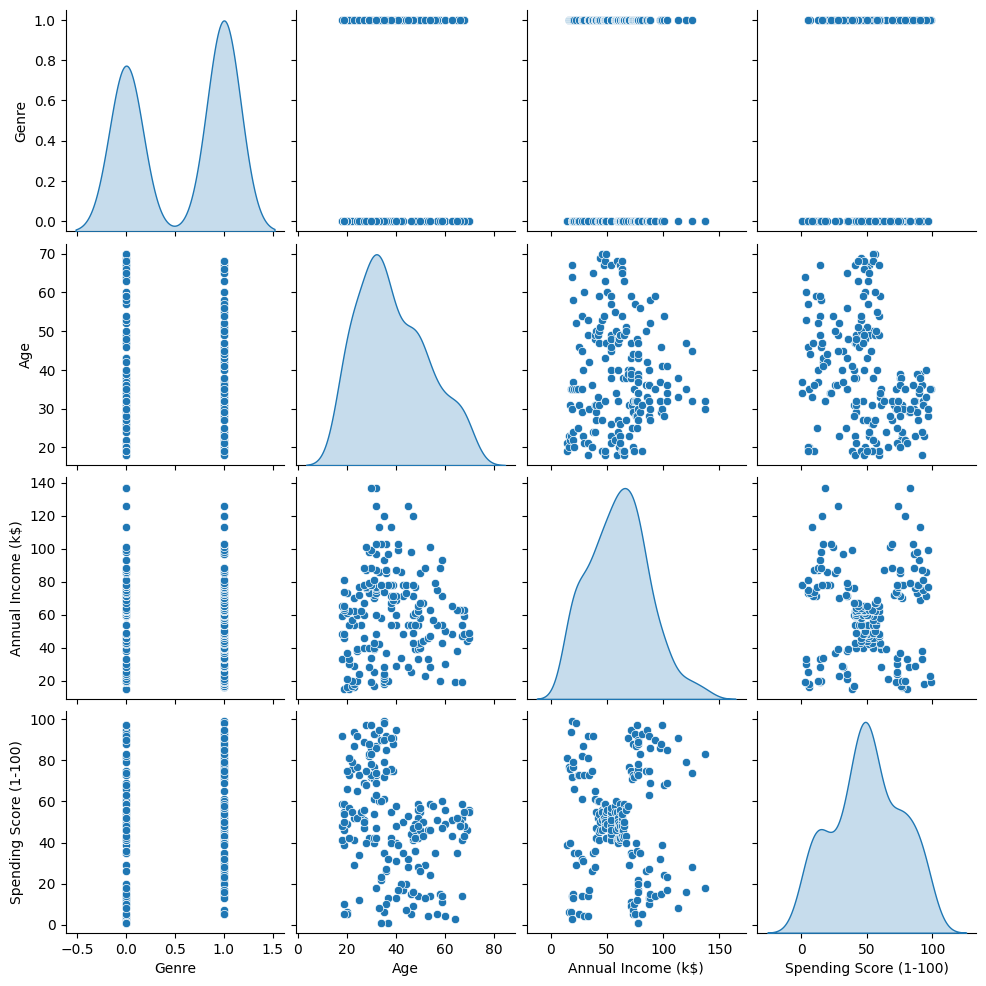

In [9]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [10]:
# Select the features for clustering (Age, Annual Income, Spending Score)
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [11]:
# Specify the number of clusters (you can change this as per your requirement)
num_clusters = 5

## Perform Agglomerative Clustering

In [12]:
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
df['Cluster'] = agg_clustering.fit_predict(X)

In [13]:
# Display the clusters assigned to each data point
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        4
1   21                  15                      81        3
2   20                  16                       6        4
3   23                  16                      77        3
4   31                  17                      40        4


## Visualize the clusters

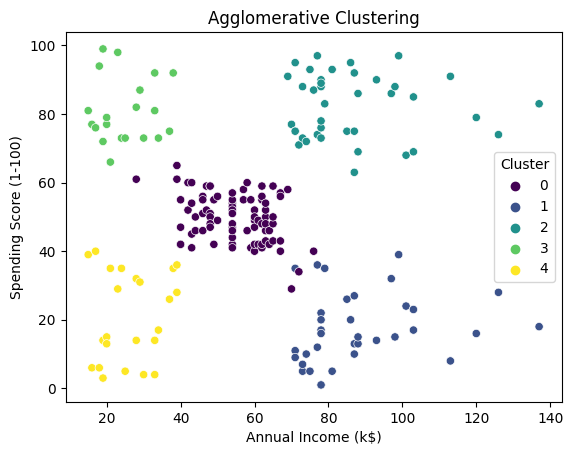

In [14]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()